#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings 
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

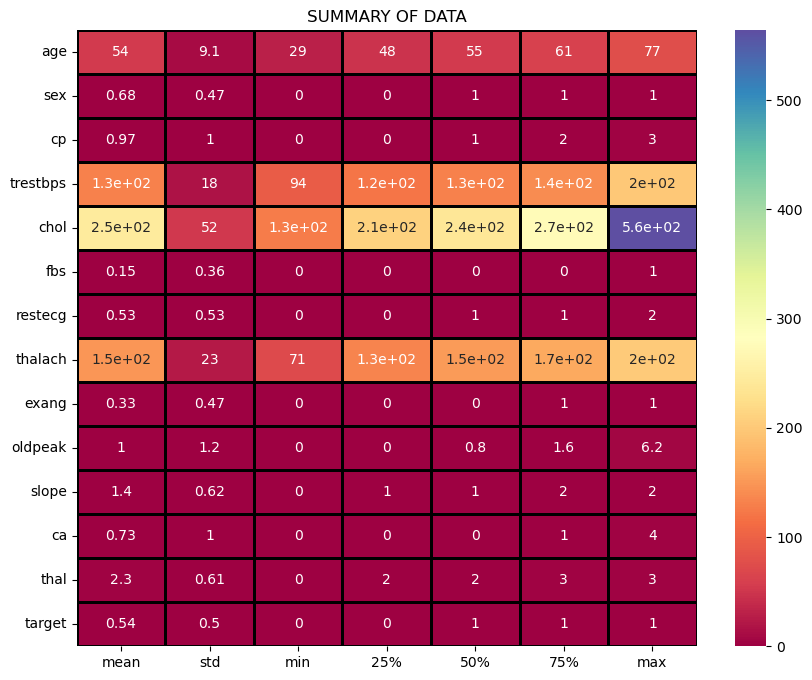

In [13]:
#plotting a description using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="black",
            linewidth=1,cmap=sns.color_palette("Spectral", as_cmap=True))
plt.title("SUMMARY OF DATA")
plt.show()

In [14]:
def plot_data(column_name, data):
    plt.figure(figsize = (12,6))
    
    #Histogram plot using sns.histoplot()
    plt.subplot(1,3,1)
    sns.histplot(data[column_name], kde = False, bins=10)
    plt.title(f"{column_name.capitalize()} Histogram")
    
    #Distribution plot using sns.distplot()
    plt.subplot(1,3,2)
    sns.distplot(data[column_name], hist = True)
    plt.title(f"{column_name.capitalize()} Distribution plot")
    
    
    #Box plot using sns.boxplot()
    plt.subplot(1,3,3)
    sns.boxplot(data[column_name], orient = 'v')
    plt.title(f"{column_name.capitalize()} Box plot")
    
    plt.show()

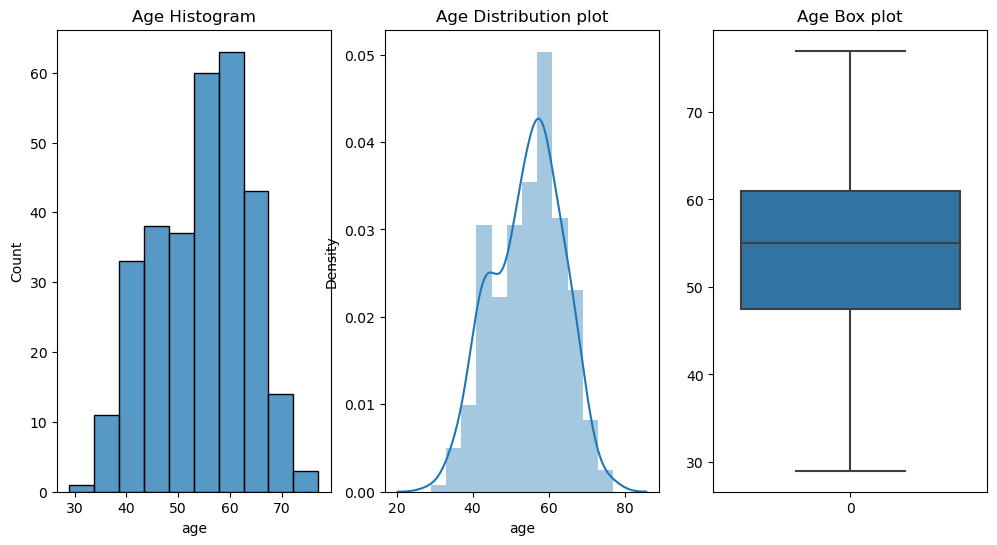

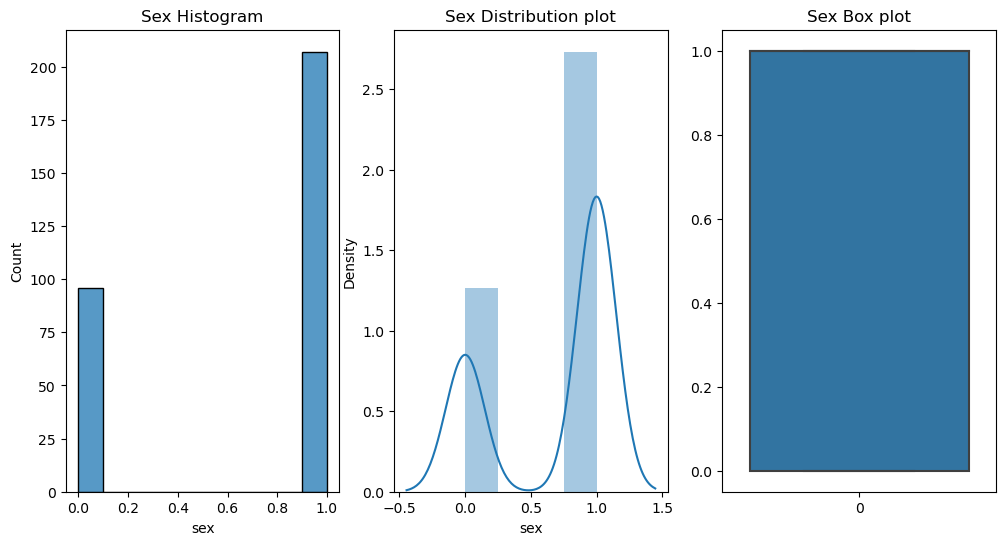

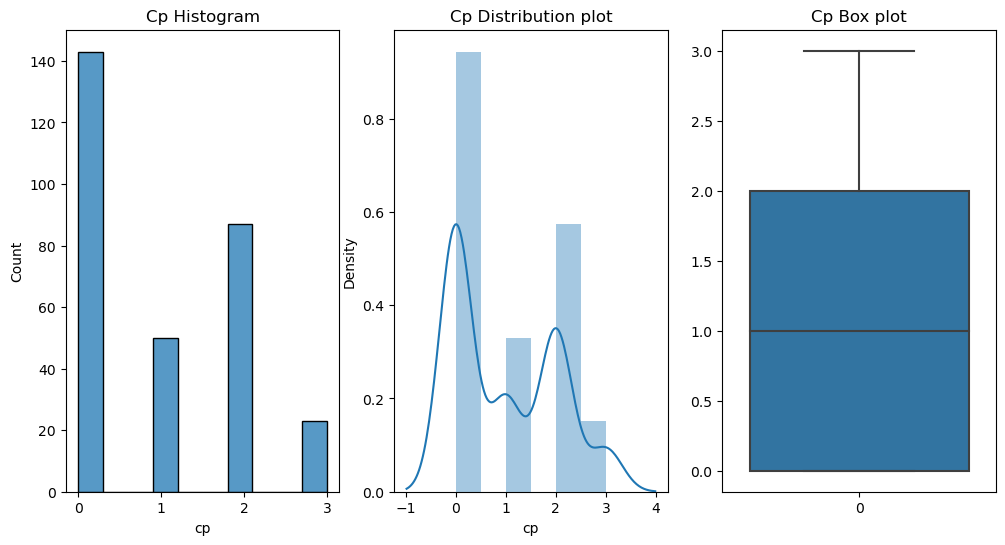

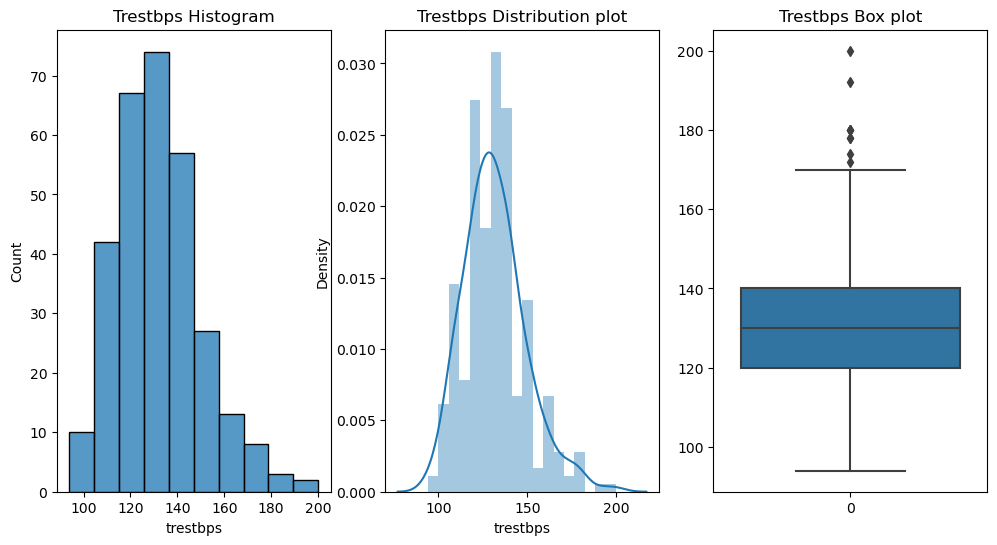

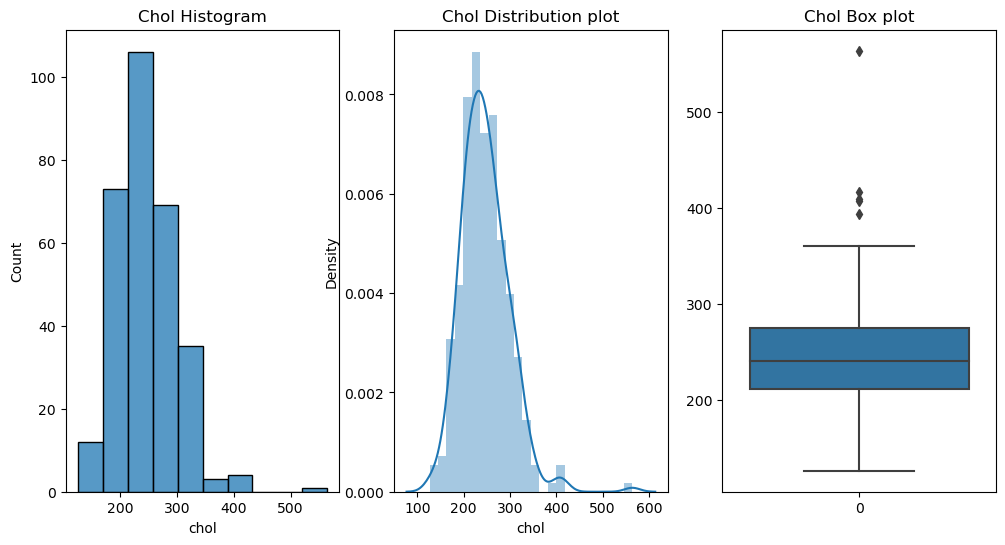

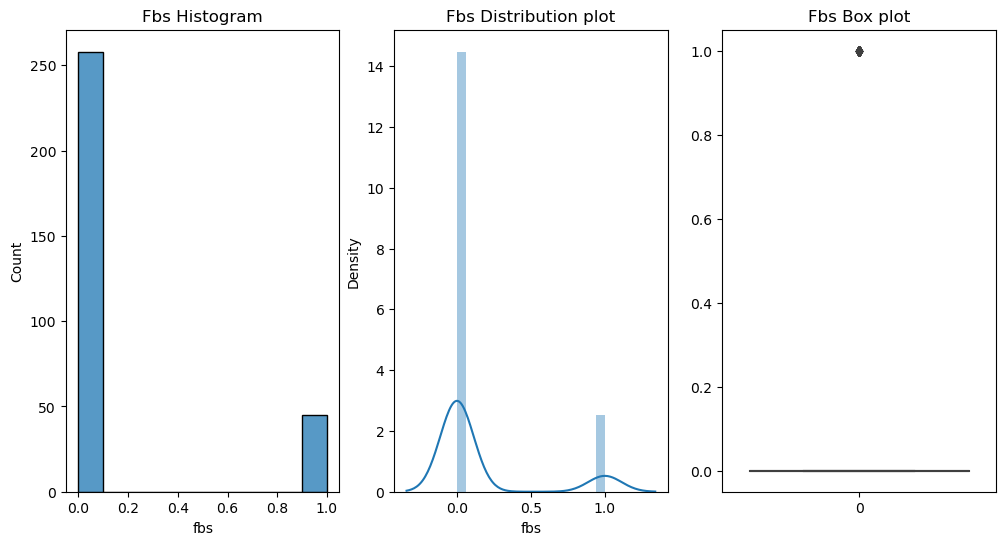

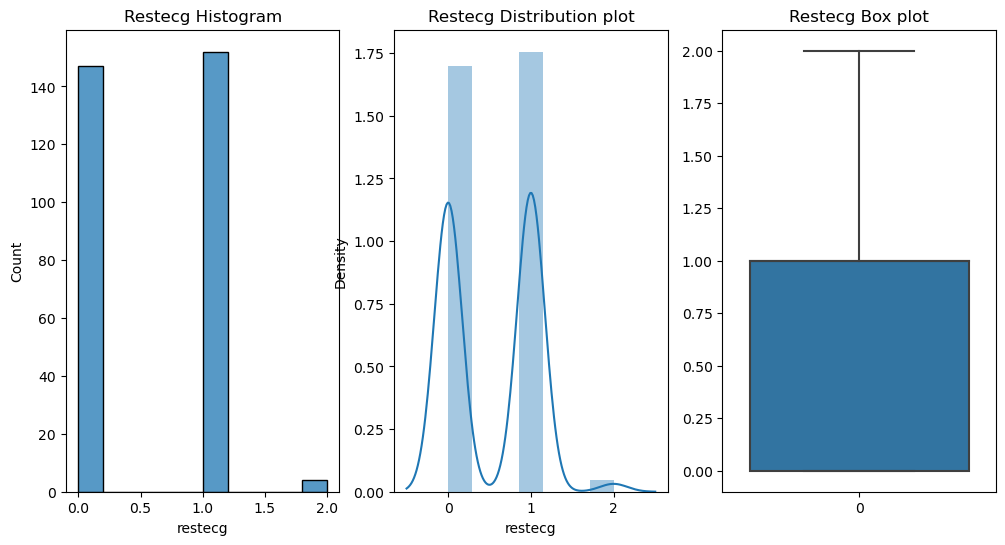

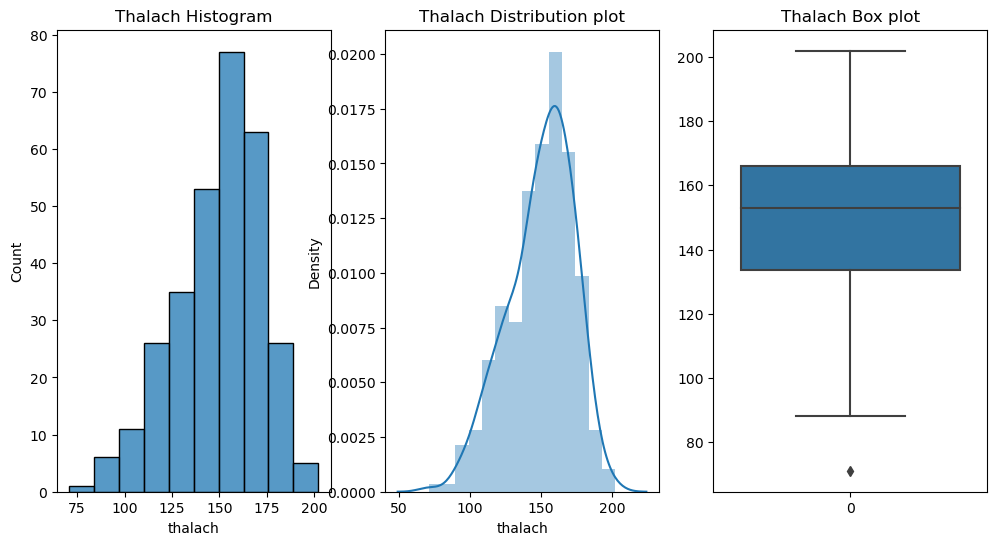

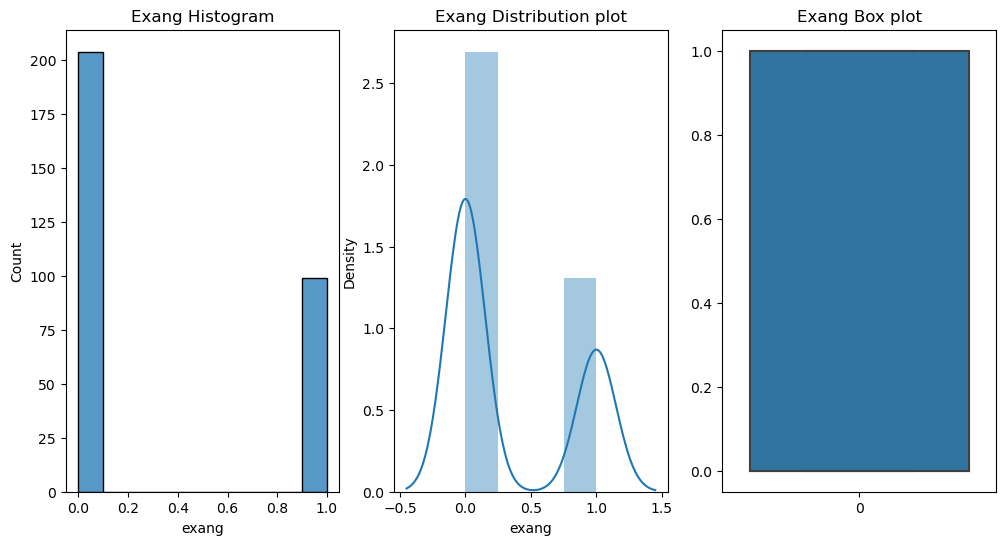

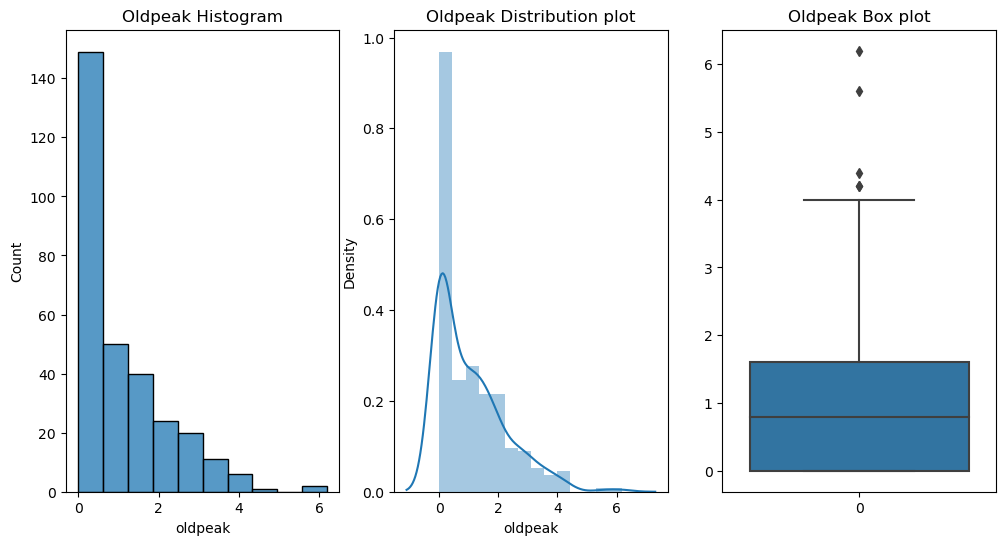

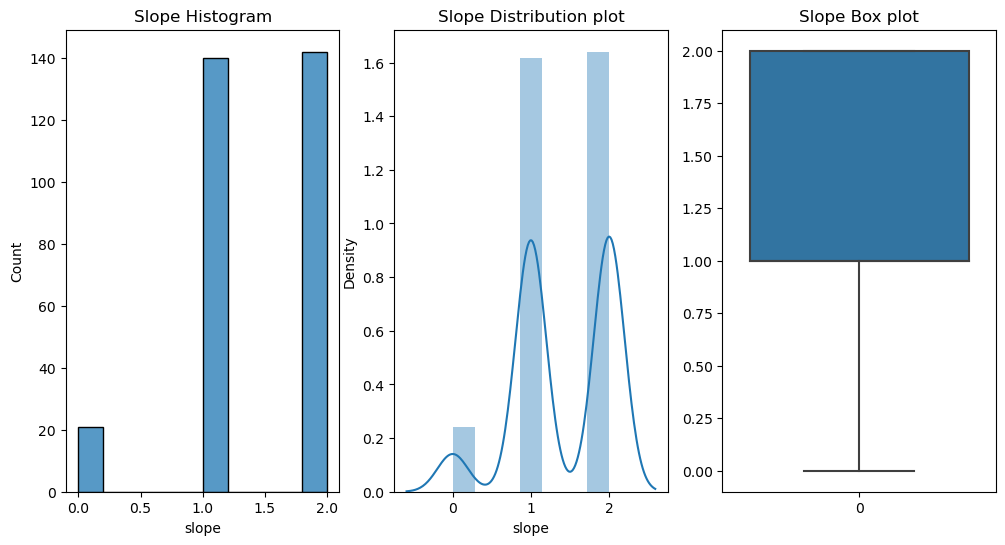

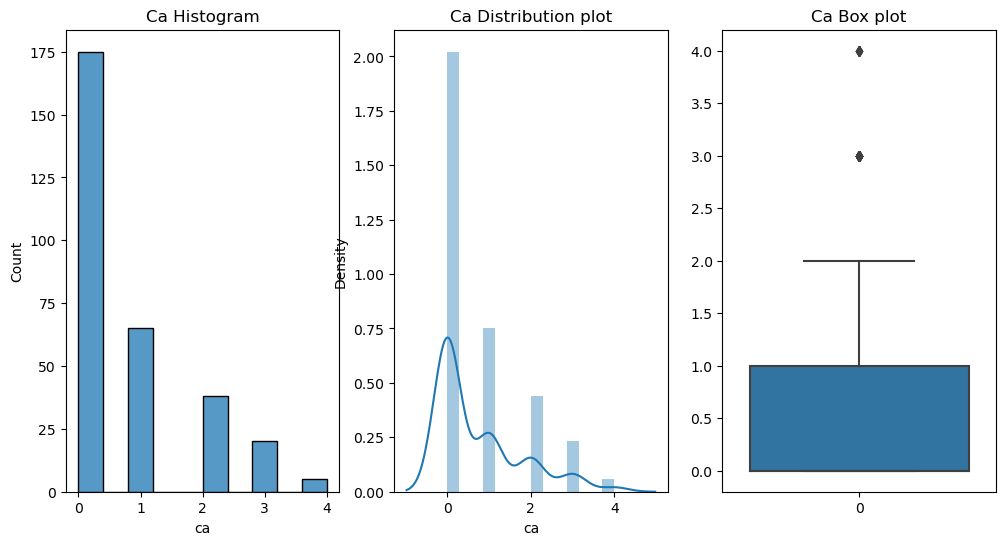

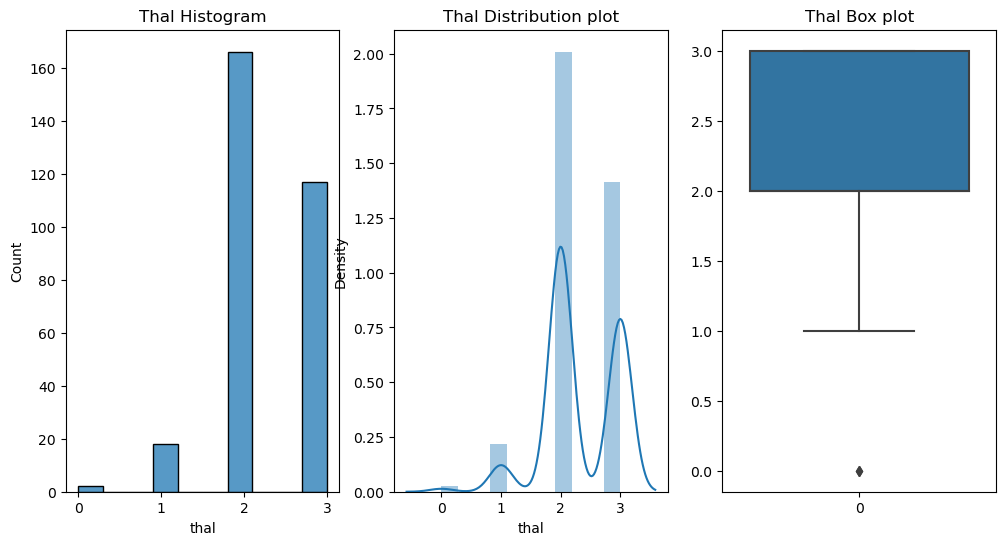

In [15]:
for i in df.iloc[:,0:-1]:
    plot_data(i, df)

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

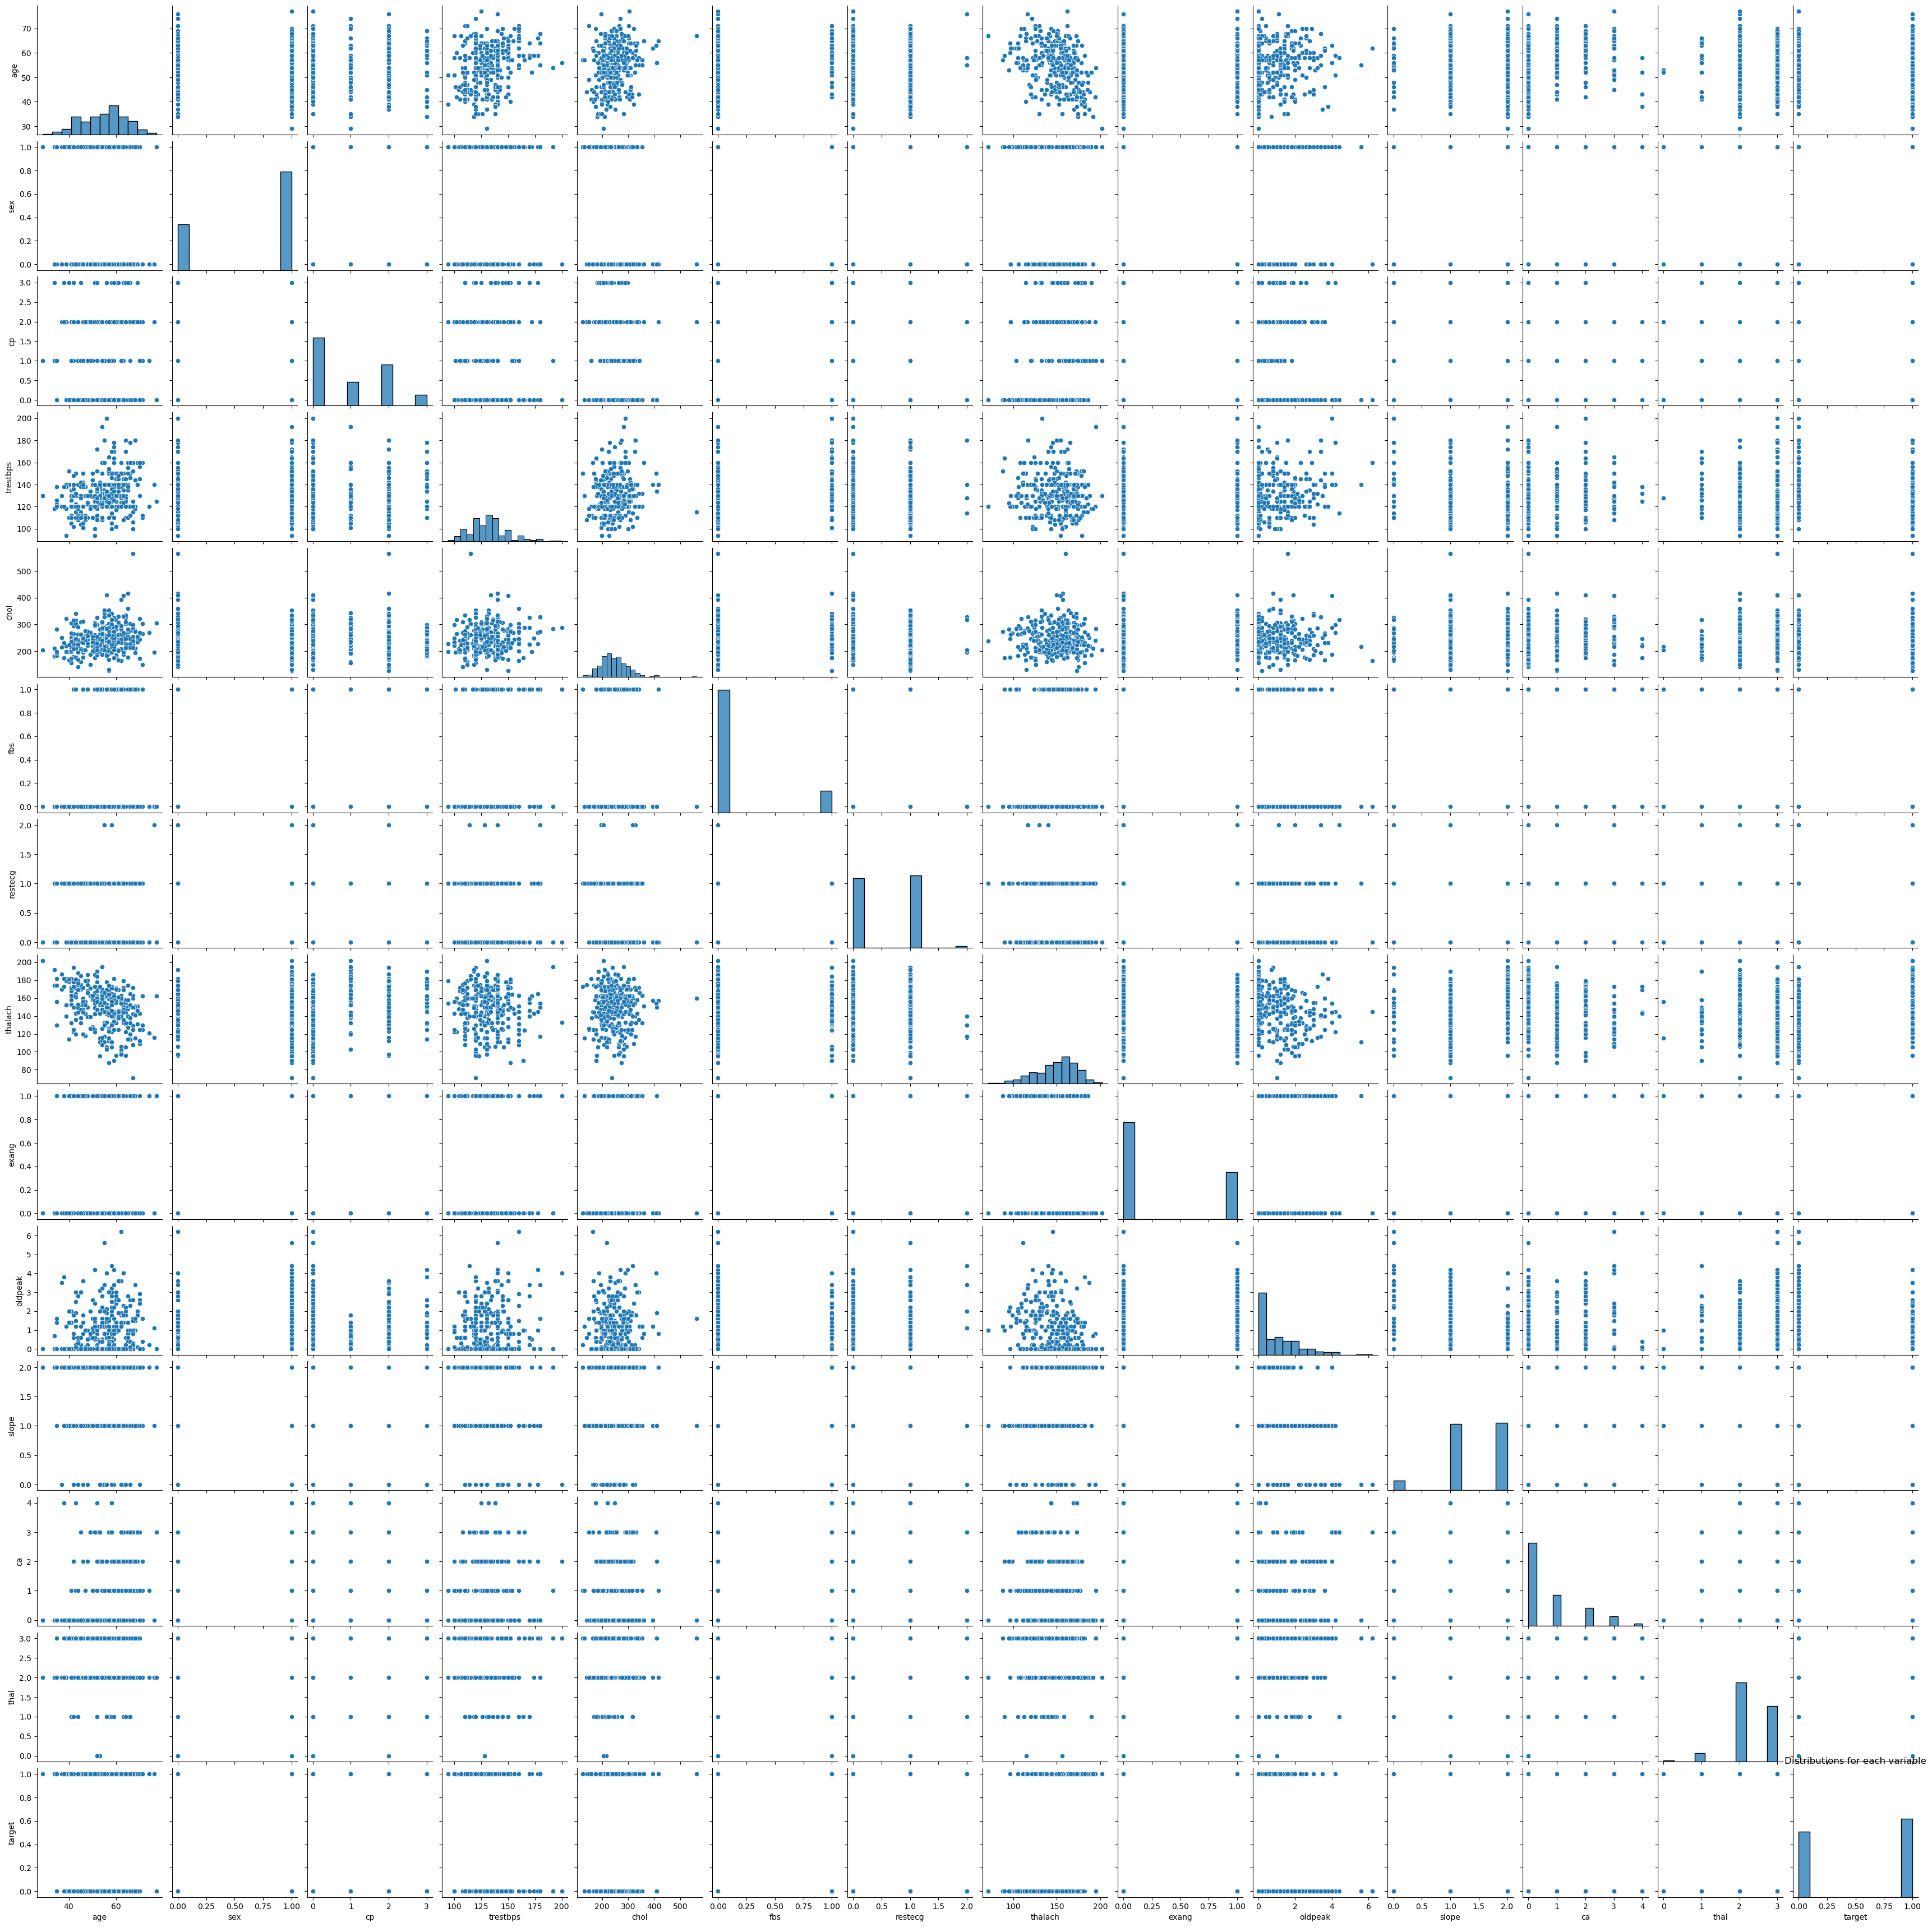

In [17]:
sns.pairplot(data=df)
plt.title('Distributions for each variable')
plt.show()

<Axes: xlabel='thal', ylabel='count'>

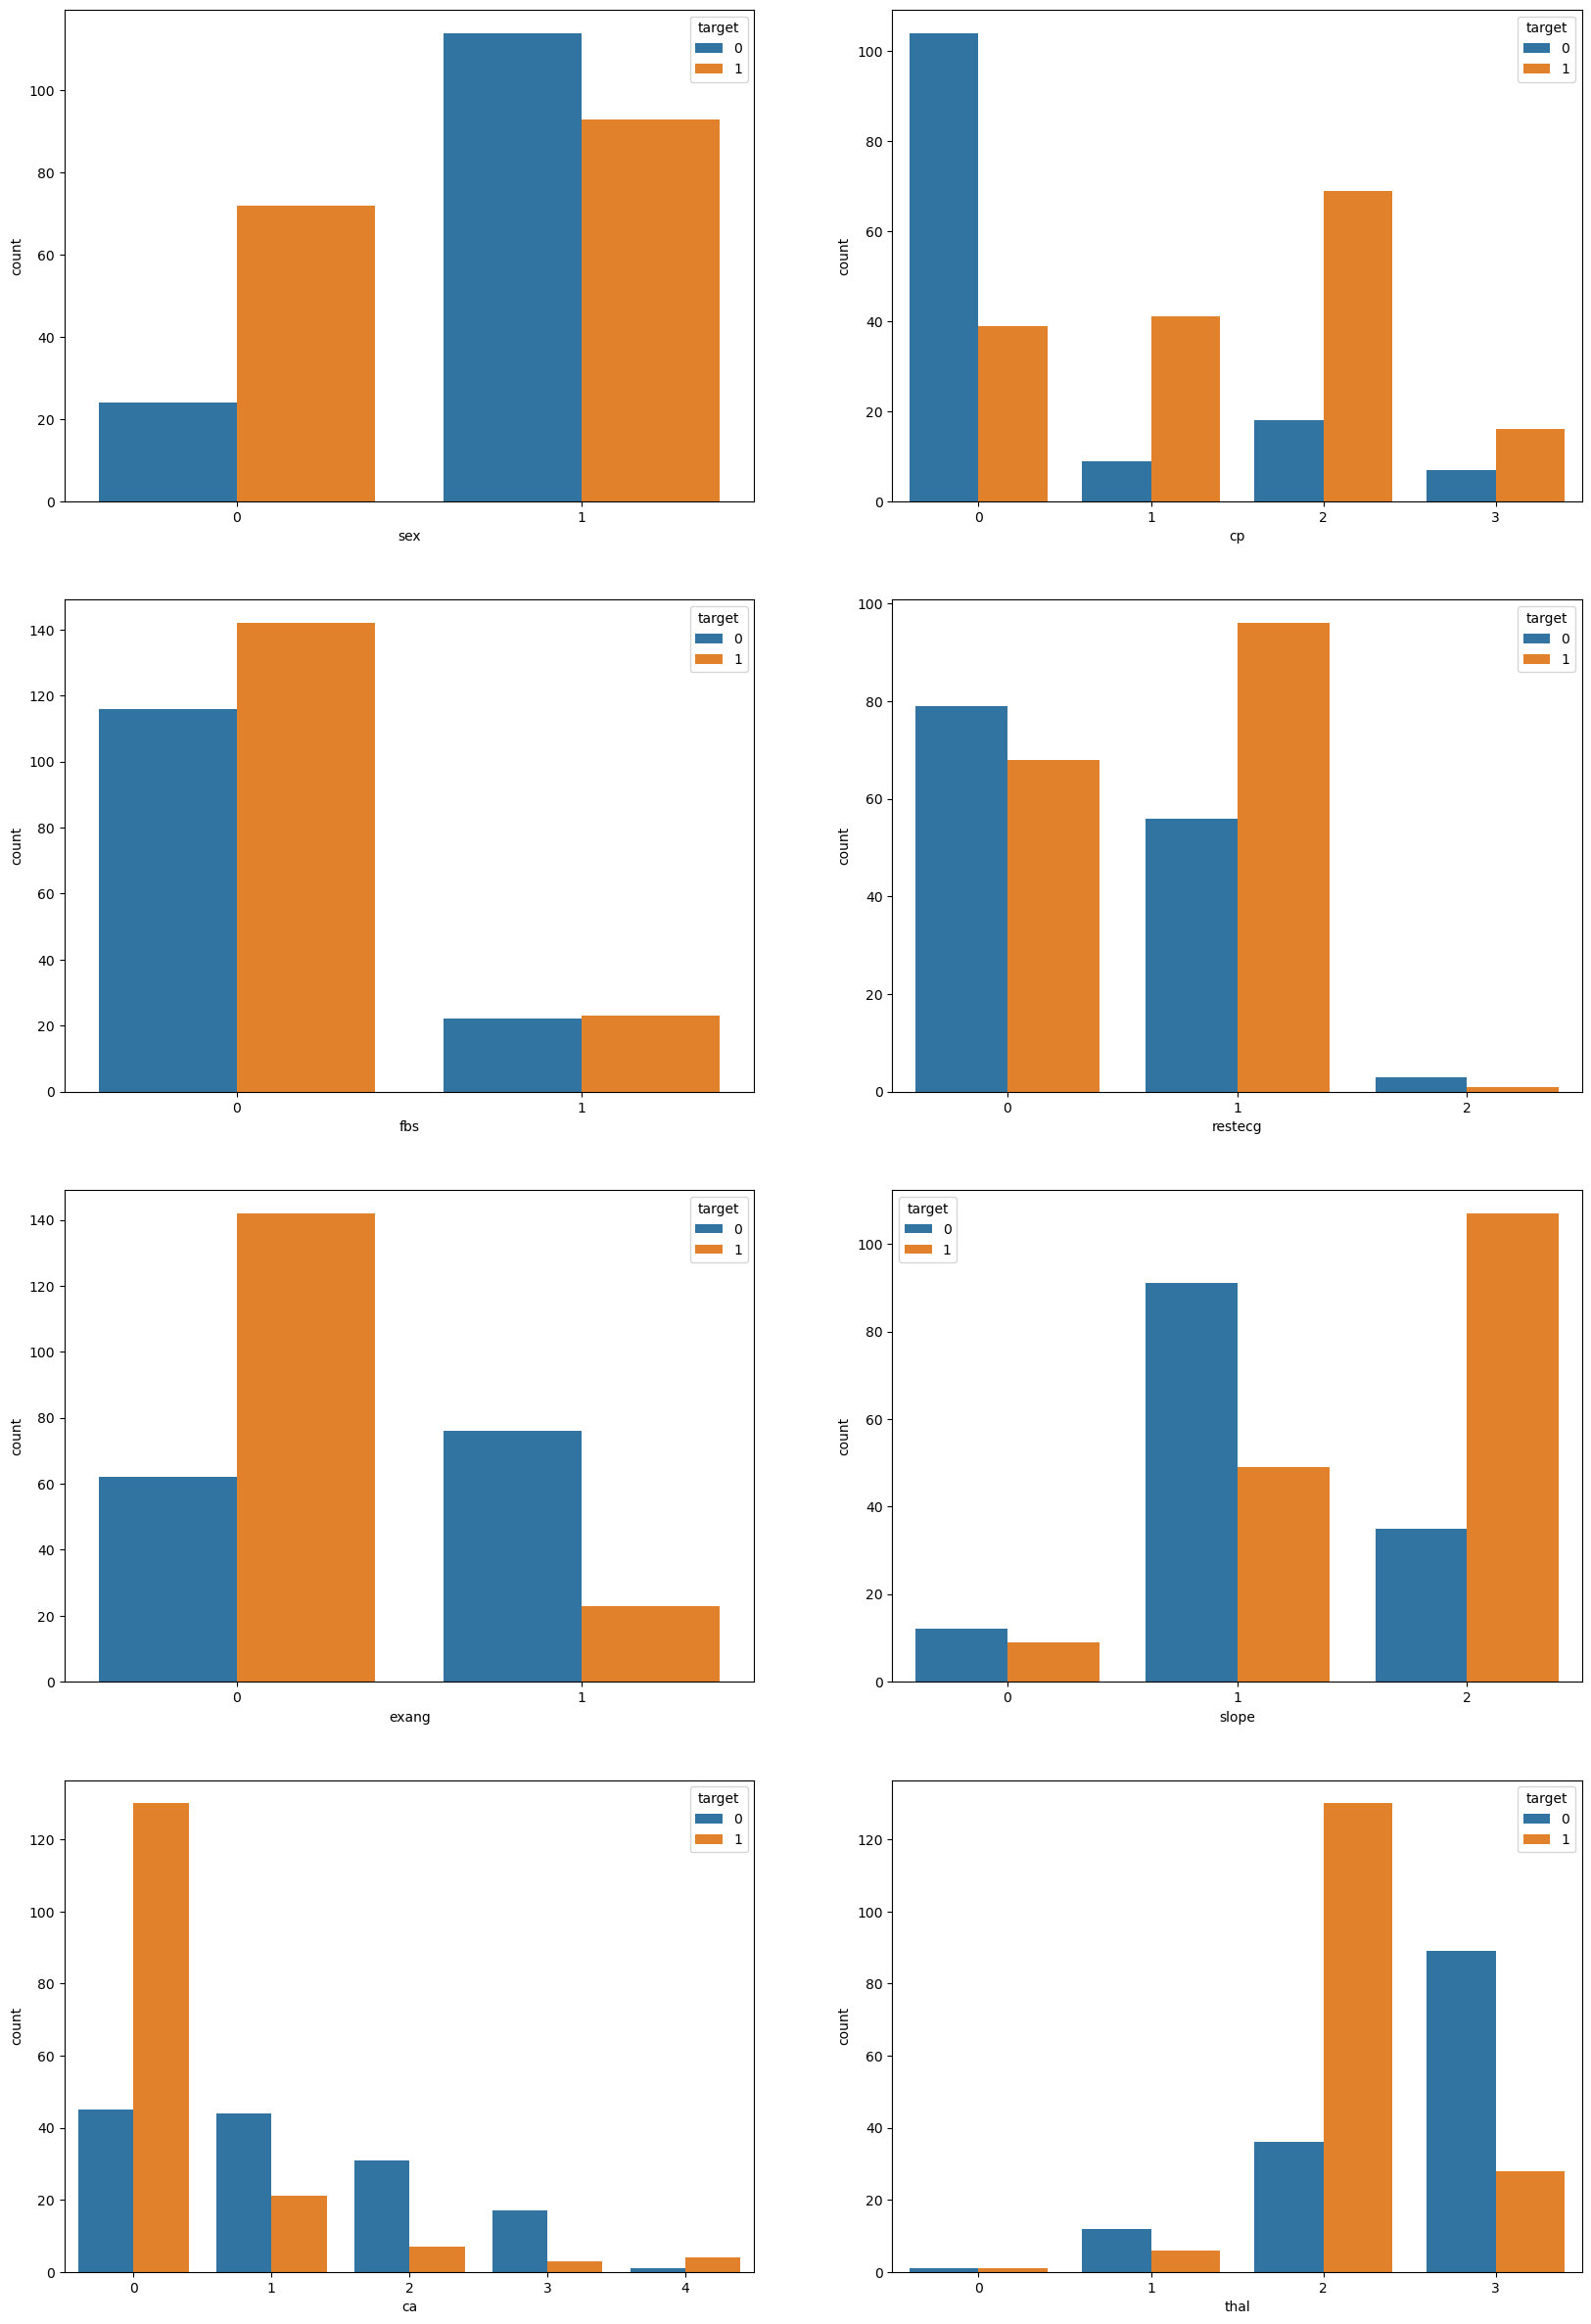

In [18]:
#plotting a count plots with respect to target column
fig, axarr = plt.subplots(4, 2, figsize=(20, 30))
sns.countplot(x='sex', hue = 'target',data = df, ax=axarr[0][0])
sns.countplot(x='cp', hue = 'target',data = df, ax=axarr[0][1]) 
sns.countplot(x='fbs', hue = 'target',data = df, ax=axarr[1][0])
sns.countplot(x='restecg', hue = 'target',data = df, ax=axarr[1][1])
sns.countplot(x='exang', hue = 'target',data = df, ax=axarr[2][0])
sns.countplot(x='slope', hue = 'target',data = df, ax=axarr[2][1]) 
sns.countplot(x='ca', hue = 'target',data = df, ax=axarr[3][0])
sns.countplot(x='thal', hue = 'target',data = df, ax=axarr[3][1])

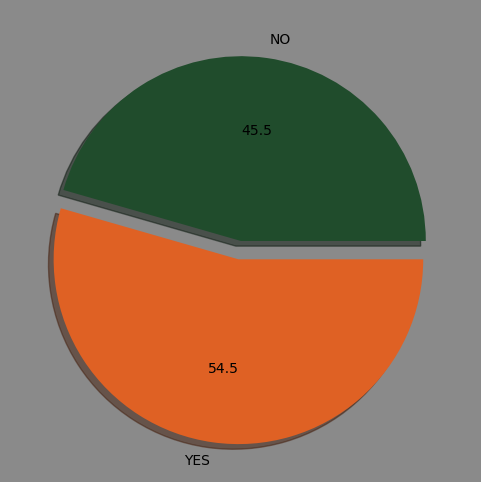

In [19]:
#percentage of target variable
a=df.groupby('target')['target'].count()
a
plt.figure(figsize=(6,6),facecolor='#8a8a8a')
plt.pie(data=df,x=a,labels=['NO','YES'],autopct='%.01f',explode=[0,0.1],shadow=True,center=(0, 0),colors=['#204c2c','#df6124'])
plt.grid()
plt.show()

<Axes: >

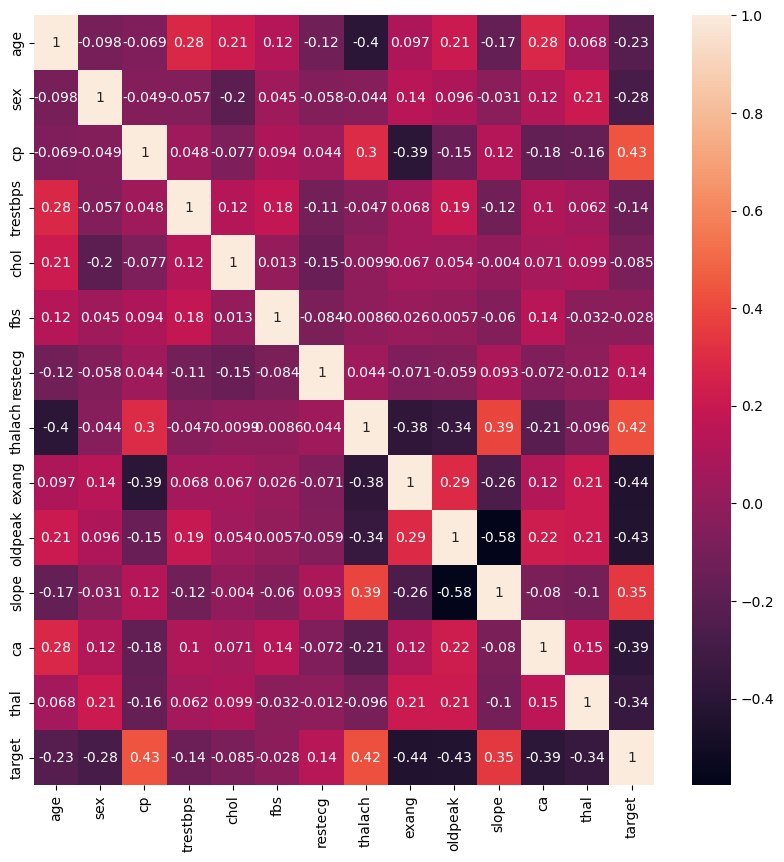

In [21]:
#Heat map for correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

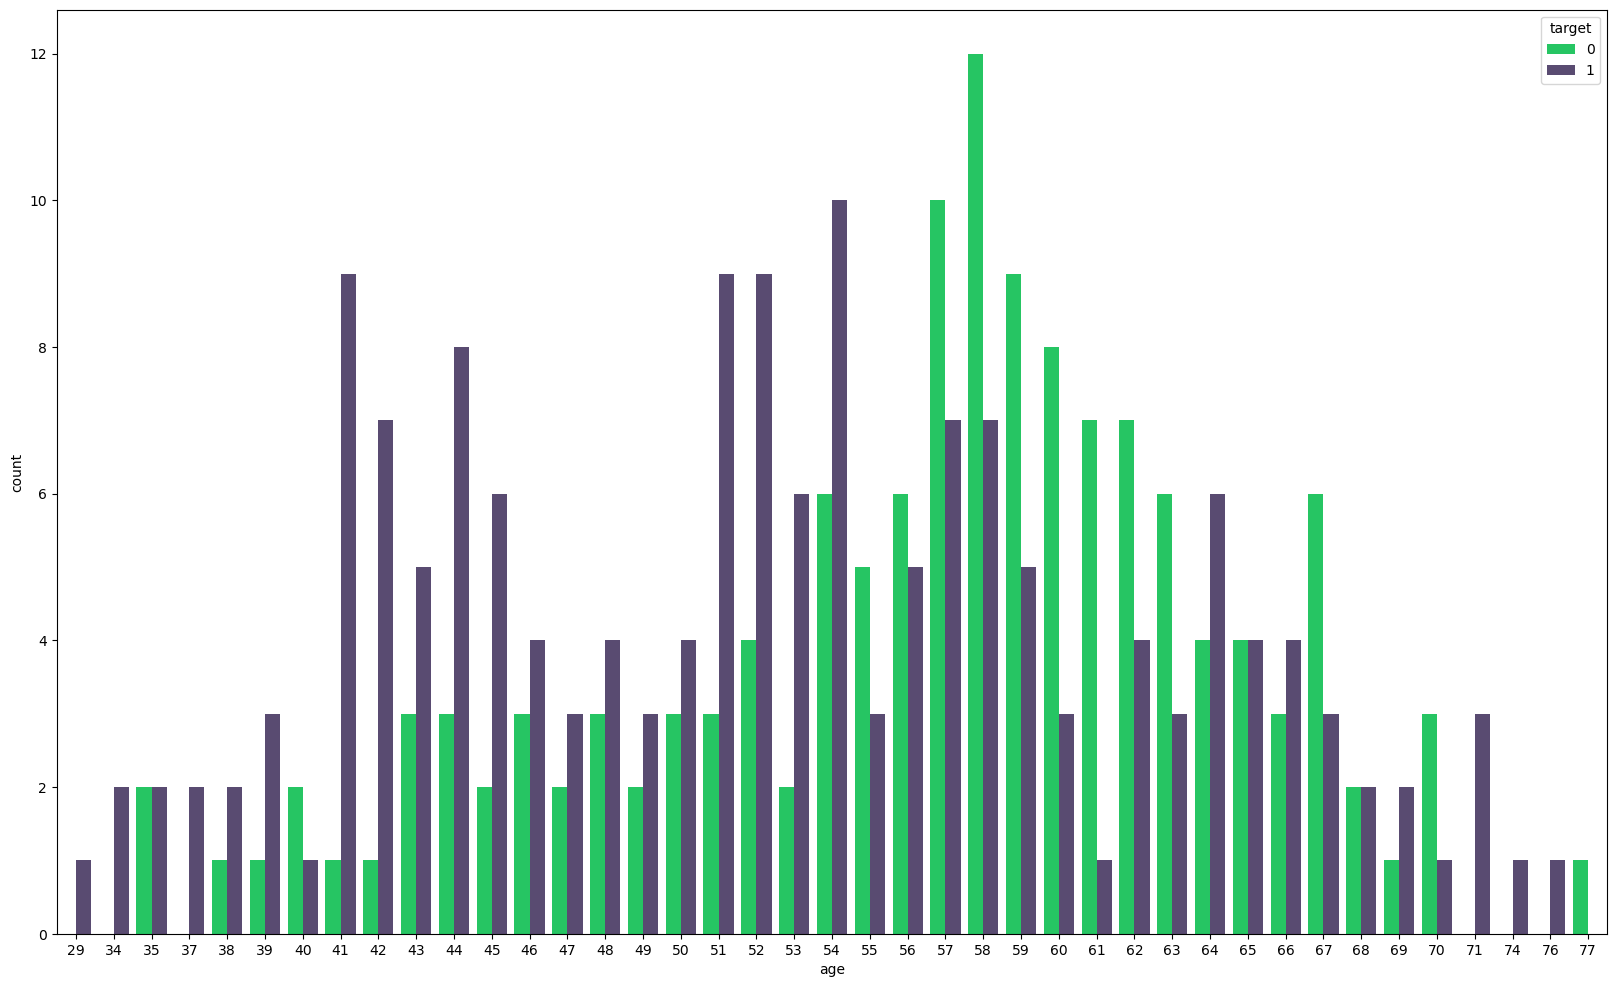

In [23]:
#Evauating age distribution
cols= ["#0be05d","#574577"]
plt.figure(figsize=(20,12))
sns.countplot(x=df['age'],data=df, hue ="target",palette= cols)
plt.show()

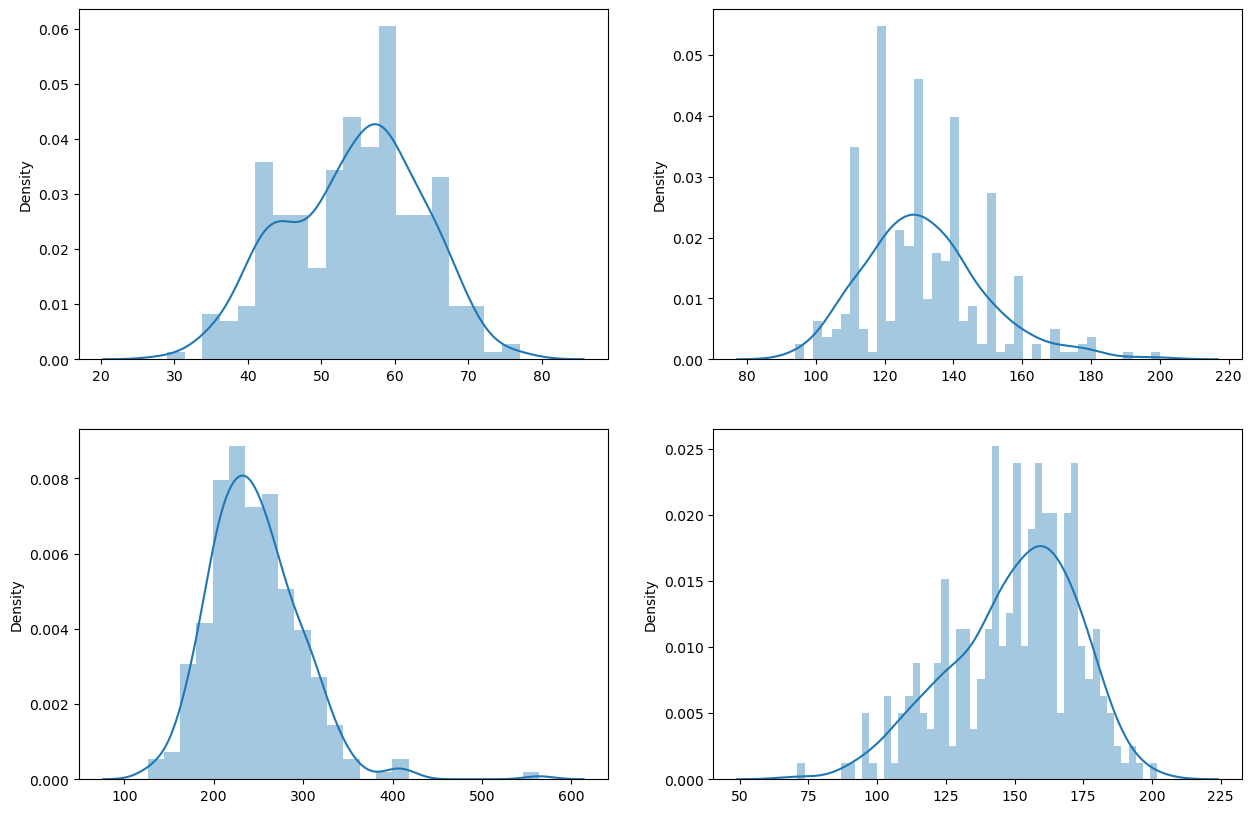

In [24]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(x=df['age'],bins=20,label=['AGE'],ax=axarr[0][0],kde=True)
sns.distplot(x=df['trestbps'],bins=40,label=['trestbps'],ax=axarr[0][1],kde=True) 
sns.distplot(x=df['chol'],label=['chol'],ax=axarr[1][0],kde=True)
sns.distplot(x=df['thalach'],bins=50,label=['thalach'],ax=axarr[1][1],kde=True)
plt.show()

In [25]:
print('skewness of thalach:',df.thalach.skew())
print('skewness of chol:',df.chol.skew())
print('skewness of trestbps :',df.trestbps.skew())
print('skewness of ages:',df.age.skew())

skewness of thalach: -0.5374096526832253
skewness of chol: 1.1434008206693387
skewness of trestbps : 0.7137684379181465
skewness of ages: -0.2024633654856539


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)

In [115]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracy = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train Score:",np.mean(accuracy))
print("Test Score:",lr_model.score(X_test,y_test))

Train Score: 0.6819727891156462
Test Score: 0.7540983606557377


In [114]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
accuracy = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracy))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.5860544217687076
Test Score: 0.6885245901639344


In [116]:
from sklearn.model_selection import cross_val_score
svc = SVC(random_state = 101)
accuracy = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracy))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.5620748299319728
Test Score: 0.4918032786885246


In [117]:
svc = SVC(random_state=101)
accuracies = cross_val_score(svc,X_train,y_train,cv=5,verbose=5)
svc.fit(X_train,y_train)
print('train score:')
print(np.mean(accuracies))
print('test score:')
print(svc.score(X_test,y_test))

[CV] END ................................ score: (test=0.551) total time=   0.0s
[CV] END ................................ score: (test=0.551) total time=   0.0s
[CV] END ................................ score: (test=0.562) total time=   0.0s
[CV] END ................................ score: (test=0.562) total time=   0.0s
[CV] END ................................ score: (test=0.583) total time=   0.0s
train score:
0.5620748299319728
test score:
0.4918032786885246


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [119]:
target = df['target']
df = df.drop(['target'], axis=1)

KeyError: 'target'

In [120]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<Axes: >

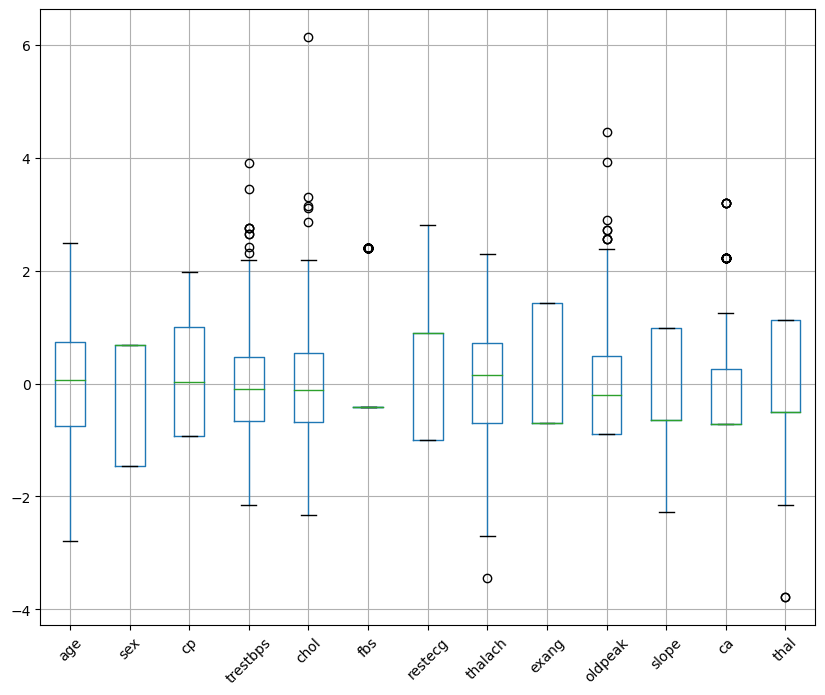

In [121]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(copy=True, 
                            with_mean=True, 
                            with_std=True)
scaled_array = std_scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.boxplot(figsize=(10,8), rot=45)

In [122]:
scaled_df['target'] = target
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


In [124]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [126]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

X_res.shape,y_res.shape

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 165, 0: 138})
Resampled dataset shape Counter({1: 155, 0: 155})


In [128]:
X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.8062074829931973
Test Score: 0.819672131147541


In [89]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=4)
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)

train_score = Rf.score(X_train, y_train)
test_score = Rf.score(X_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9752066115702479
Test Score: 1.0


In [130]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=5)
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)

train_score = Rf.score(X_train, y_train)
test_score = Rf.score(X_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9628099173553719
Test Score: 1.0


In [131]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=7)

In [132]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.6813186813186813,
 array([[25, 20],
        [ 9, 37]], dtype=int64))

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7472527472527473

In [136]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.6949152542372882


In [137]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall is: ",recall)

Recall is:  0.8913043478260869


In [138]:
print((2*precision*recall)/(precision+recall))

0.780952380952381


In [140]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1]


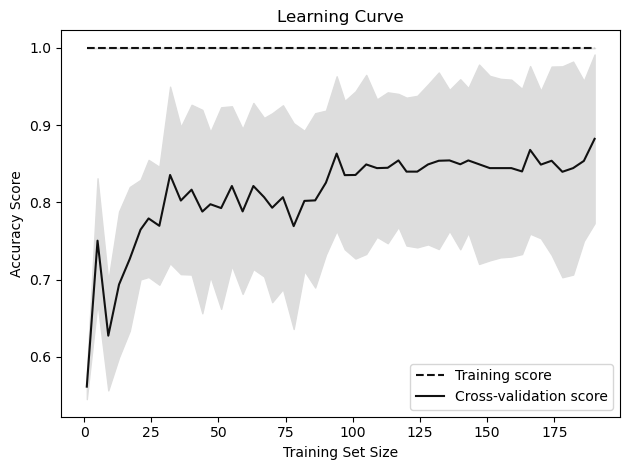

In [142]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [144]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 78.02 %


In [147]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.780


In [149]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.906
Accuracy on test set: 0.791


<Axes: >

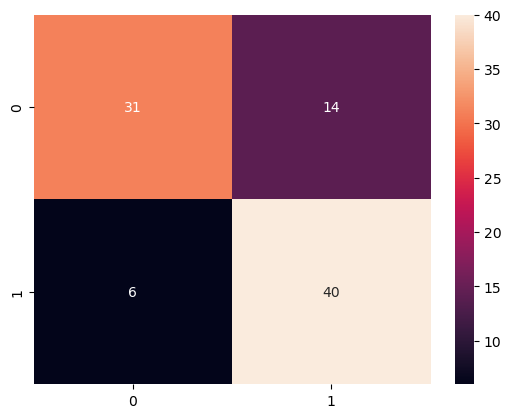

In [151]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")


In [162]:
scores_total = []

for kernel in ('linear', 'poly', 'rbf'):
    if kernel == 'poly':
        clf = SVC(kernel=kernel, degree=2)
    else:
        clf = SVC(kernel=kernel)
    scores_total.append(cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(kernel + ' classification report:')
    print(classification_report(y_test, y_pred))

linear classification report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.73        45
           1       0.71      0.87      0.78        46

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.75        91

poly classification report:
              precision    recall  f1-score   support

           0       0.77      0.51      0.61        45
           1       0.64      0.85      0.73        46

    accuracy                           0.68        91
   macro avg       0.70      0.68      0.67        91
weighted avg       0.70      0.68      0.67        91

rbf classification report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        45
           1       0.71      0.89      0.79        46

    accuracy                           0.76        91
   macro avg       0.78      0.76      0.75

In [165]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=101).fit(X, y)
roc_auc_score(y, clf.decision_function(X))


0.9946488029173934

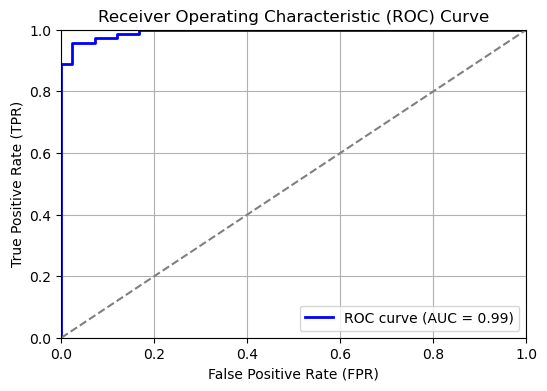

In [167]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset and split it into training and testing sets
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Train the Logistic Regression model
clf = LogisticRegression(solver="liblinear", random_state=101).fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve values (FPR, TPR, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [170]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [171]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Decision Trees,0.938596
Logistic Regression,0.947368
Naive Bayes,0.947368
Random Forests,0.973684


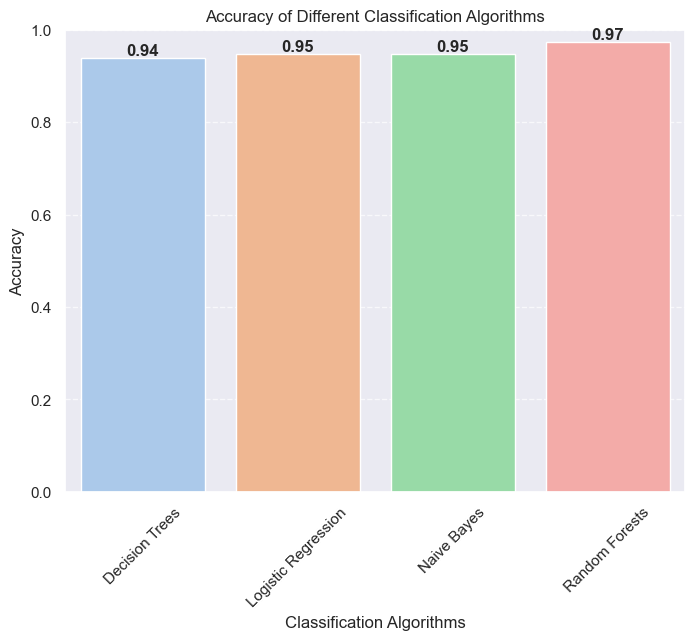

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the accuracy list and defined the classifiers list.

# Create a Pandas DataFrame to store the accuracy scores
summary = pd.DataFrame({'accuracy': accuracy}, index=classifiers)

# Create a color palette with different colors for each category
# You can customize the colors by modifying the 'palette' argument.
palette = sns.color_palette('pastel')

# Create a bar plot for the accuracy scores using the specified color palette
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=summary.index, y=summary['accuracy'], palette=palette)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Algorithms')
plt.ylim(0.0, 1.0)  # Set the y-axis limit to show accuracy values between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for i, accuracy in enumerate(summary['accuracy']):
    ax.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()



# Conclusion

* Model Performance: The evaluated classification algorithms showed good performance in distinguishing between benign and malignant breast cancer cases.


* Random Forests Performs Best: Among the evaluated algorithms, Random Forests achieved the highest accuracy of 97.37%. It exhibited excellent discriminative power and outperformed the other algorithms in classifying breast cancer cases.


* Logistic Regression and Naive Bayes: Both Logistic Regression and Naive Bayes achieved competitive performance, with accuracies of 94.74% and 94.74%, respectively. They demonstrated comparable effectiveness in classification tasks.


* Decision Trees: Decision Trees also performed well, with an accuracy of 93.86%. It showed good discriminative ability, although slightly lower compared to Random Forests.


* Equal Accuracy for Naive Bayes and Logistic Regression: Naive Bayes and Logistic Regression achieved the same accuracy of 94.74%. This suggests that they are equally effective for this specific breast cancer classification task.